In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread

In [2]:
data_dir = 'cell_images'

In [3]:
os.listdir(data_dir)

['train', 'test']

In [4]:
test_path = data_dir + '/test/'
train_path = data_dir + '/train/'

In [5]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [6]:
test_size = len(os.listdir(test_path+"/parasitized/")) + len(os.listdir(test_path+"/uninfected/"))
test_size

2600

In [7]:
train_size = len(os.listdir(train_path+"/parasitized/")) + len(os.listdir(train_path+"/uninfected/"))
train_size

24960

In [8]:
para_image = train_path+"parasitized/" + os.listdir(train_path + "parasitized/")[0]
para_image

'cell_images/train/parasitized/C116P77ThinF_IMG_20150930_171558_cell_101.png'

In [9]:
imread(para_image).shape

(127, 115, 3)

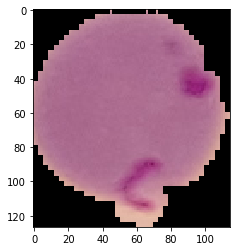

In [10]:
plt.imshow(imread(para_image))

In [11]:
uninfected_image = train_path+"uninfected/" + os.listdir(train_path + "uninfected/")[0]
uninfected_image

'cell_images/train/uninfected/C169P130ThinF_IMG_20151119_144354_cell_171.png'

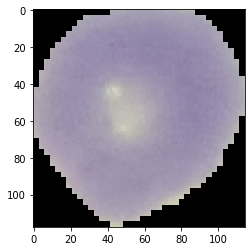

In [12]:
plt.imshow(imread(uninfected_image))

# Need to convert every image to some fix dimension

In [13]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + "uninfected/"):
    img = imread(test_path + "uninfected/"+ image_filename)
    shape1, shape2, colors = img.shape
    dim1.append(shape1)
    dim2.append(shape2)

In [14]:
dim1, dim2

([178,
  163,
  127,
  124,
  100,
  142,
  157,
  124,
  121,
  130,
  118,
  130,
  127,
  124,
  145,
  133,
  151,
  121,
  103,
  115,
  121,
  133,
  136,
  160,
  163,
  130,
  109,
  121,
  133,
  124,
  136,
  136,
  118,
  118,
  133,
  127,
  103,
  121,
  121,
  118,
  112,
  133,
  109,
  127,
  118,
  133,
  124,
  142,
  145,
  151,
  130,
  130,
  97,
  97,
  112,
  112,
  127,
  142,
  115,
  130,
  115,
  142,
  145,
  127,
  103,
  127,
  148,
  136,
  121,
  115,
  106,
  136,
  160,
  142,
  154,
  121,
  115,
  127,
  121,
  130,
  130,
  136,
  130,
  115,
  106,
  109,
  115,
  142,
  124,
  142,
  139,
  136,
  118,
  139,
  133,
  133,
  118,
  160,
  142,
  127,
  142,
  175,
  157,
  124,
  124,
  121,
  118,
  148,
  160,
  103,
  97,
  127,
  121,
  148,
  127,
  139,
  160,
  193,
  100,
  130,
  115,
  106,
  118,
  127,
  88,
  124,
  106,
  124,
  154,
  121,
  124,
  139,
  127,
  130,
  151,
  109,
  103,
  130,
  148,
  145,
  184,
  118,
  124,
  1

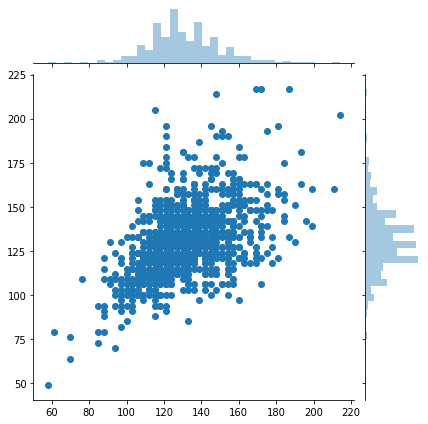

In [15]:
sns.jointplot(dim1, dim2)

In [16]:
#resizing every image to same dimension
print(np.mean(dim1))
print(np.mean(dim2))

130.92538461538462
130.75


In [17]:
image_shape = (130, 130, 3)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Feeding the data by the image generator with little transformation

In [19]:
image_gen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            fill_mode='nearest'
            )

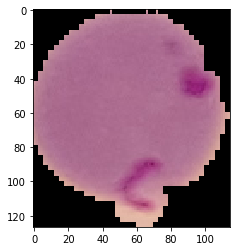

In [20]:
plt.imshow(imread(para_image))

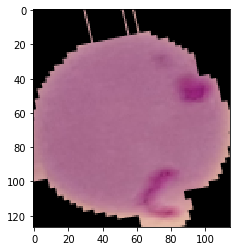

In [21]:
plt.imshow(image_gen.random_transform(imread(para_image)))

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape,  activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape,  activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape,  activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [28]:
batch_size = 16

In [29]:
train_image_gen = image_gen.flow_from_directory(
                    train_path,
                    target_size=image_shape[:2],
                    color_mode='rgb',
                    batch_size=batch_size,
                    class_mode='binary'
                    )

Found 24958 images belonging to 2 classes.


In [30]:
test_image_gen = image_gen.flow_from_directory(
                    test_path,
                    target_size=image_shape[:2],
                    color_mode='rgb',
                    batch_size=batch_size,
                    class_mode='binary',
                    shuffle=False
                    )

Found 2600 images belonging to 2 classes.


In [31]:
# results = model.fit_generator(train_image_gen,epochs=20,
#                              validation_data = test_image_gen,
#                              callbacks = [early_stop])

In [32]:
from tensorflow.keras.models import load_model

In [33]:
model = load_model('malaria_detector.h5')

In [34]:
# losses = pd.DataFrame(model.history.history)

AttributeError: 'Sequential' object has no attribute 'history'

In [ ]:
# losses[['loss', 'val_loss']].plot()

In [35]:
model.evaluate_generator(test_image_gen)

[1.9848296488720947, 0.8676923]

In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
pred = model.predict_generator(test_image_gen)

In [38]:
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [39]:
# Get some values like [0.97], ...
predictions = pred > 0.5
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [47]:
classification_report(test_image_gen.classes, predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.98      0.89      1300\n           1       0.98      0.76      0.86      1300\n\n    accuracy                           0.87      2600\n   macro avg       0.89      0.87      0.87      2600\nweighted avg       0.89      0.87      0.87      2600\n'

In [48]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1277,   23],
       [ 308,  992]])

In [49]:
para_image

'cell_images/train/parasitized/C116P77ThinF_IMG_20150930_171558_cell_101.png'

In [50]:
from tensorflow.keras.preprocessing import image

In [51]:
type(image.load_img(para_image))

PIL.PngImagePlugin.PngImageFile

In [52]:
my_image = image.load_img(para_image, target_size=image_shape)

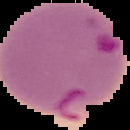

In [53]:
my_image

In [54]:
type(my_image)

PIL.Image.Image

In [55]:
my_img_arr = image.img_to_array(my_image)
my_img_arr.shape

(130, 130, 3)

In [56]:
my_img_arr = my_img_arr.reshape((1,)+image_shape)
my_img_arr.shape

(1, 130, 130, 3)

In [57]:
model.predict(my_img_arr)

array([[0.]], dtype=float32)

In [58]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}